# Introduction to Data Science
## Homework 2

In [1]:
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from IPython.display import Image
from io import StringIO
%matplotlib inline

Student Name: Xi Qin

Student Netid: xq335
***

### Preparing a Training Set and Training a Decision Tree
This is a hands-on task where we build a predictive model using Decision Trees discussed in class. For this part, we will be using the data in `cell2cell_data.csv`.

These historical data consist of 39,859 customers: 19,901 customers that churned (i.e., left the company) and 19,958 that did not churn (see the `"churndep"` variable). Here are the data set's 11 possible predictor variables for churning behavior: 

```
Pos.  Var. Name  Var. Description
----- ---------- --------------------------------------------------------------
1     revenue    Mean monthly revenue in dollars
2     outcalls   Mean number of outbound voice calls
3     incalls    Mean number of inbound voice calls
4     months     Months in Service
5     eqpdays    Number of days the customer has had his/her current equipment
6     webcap     Handset is web capable
7     marryyes   Married (1=Yes; 0=No)
8     travel     Has traveled to non-US country (1=Yes; 0=No)
9     pcown      Owns a personal computer (1=Yes; 0=No)
10    creditcd   Possesses a credit card (1=Yes; 0=No)
11    retcalls   Number of calls previously made to retention team
```

The 12th column, the dependent variable `"churndep"`, equals 1 if the customer churned, and 0 otherwise. 

1\. Load the data and prepare it for modeling. Note that the features are already processed for you, so the only thing needed here is split the data into training and testing. Use pandas to create two data frames: train_df and test_df, where train_df has 80% of the data chosen uniformly at random without replacement (test_df should have the other 20%). Also, make sure to write your own code to do the splits. You may use any random() function numpy but DO NOT use the data splitting functions from Sklearn.

In [2]:
import pandas as pd
data = pd.read_csv("data/cell2cell_data.csv", names =["revenue", "outcalls", "incalls", "months", "eqpdays", "webcap", \
                                                      "marryyes", "travel", "pcown","creditcd", "retcalls", "churndep"] )
np.random.seed(1)
msk = np.random.rand(len(data)) < 0.8
train = data[msk]
train_x = train.ix[:,0:11]
train_y = train[[11]]
test = data[~msk]
test_x = test.ix[:,0:11]
test_y = test[[11]]

## know check how many cusotmers churned in the training and testing set
print (train_y[[0]].values.sum()/float(len(train_y[[0]].values)))
print (data[[11]].values.sum()/float(len(data[[11]].values)))
print ("This means the dataset itself has a 50/50 chance of churn prediction in both random guess and majority vote.")

0.498981095401
0.499284979553
This means the dataset itself has a 50/50 chance of churn prediction in both random guess and majority vote.


2\. If we had to, how would we prove to ourselves or a colleague that our data was indeed randomly sampled on X? And by prove, I mean empirically, not just showing this person our code. Don't actually do the work, just describe in your own words a test you could here. Hint: think about this in terms of selection bias and use notes from our 2nd lecture.

Answer: In order to split the dataset, I chose the np.random.rand() function which gives me a group of numbers from 0 to 1 generated from the uniform distribution. Uniform distribution ensures that every number from 0 to 1 has the equal possibility to be chosen. I generated a list by the np.random.rand() function with the same length as the dataset. A list called **msk** is also generated which determines each number in the random number list is smaller than 0.8 or not. The **msk** list gives me boolean values that contains roughly 80% of the Trues and 20% of Falses. The **msk** is used as a classifier to decide each instance should go into the training set or testing set. When **msk** returns True, the corresponding instance goes to training set, otherwise it goes to testing set. In this situation, training set and testing set are randomly selected since the index(0 - 1 numbers) are randomly selected with the same possibility.





--

3\. Now build and train a decision tree classifier using `DecisionTreeClassifier()` [(manual page)](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) on train_df to predict the `"churndep"` target variable. Make sure to use `criterion='entropy'` when instantiating an instance of `DecisionTreeClassifier()`. For all other settings you should use all of the default options.

In [3]:
clf = DecisionTreeClassifier(criterion = 'entropy')
clf = clf.fit(train_x, train_y)

4\. Using the resulting model from 2.2, show a bar plot of feature names and their feature importance (hint: check the attributes of the `DecisionTreeClassifier()` object directly in IPython or check the manual!).

[ 0.27604175  0.17791362  0.13301761  0.08984637  0.24509195  0.00445573
  0.02412051  0.00807068  0.02064662  0.01573538  0.00505979]
0.69708361


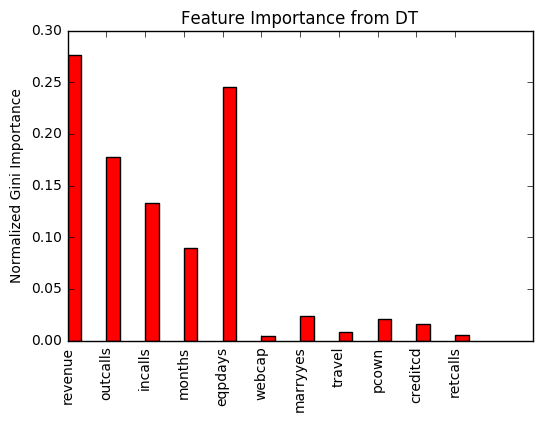

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

clf = DecisionTreeClassifier(criterion = 'entropy')
clf = clf.fit(train_x, train_y)
print (clf.feature_importances_)
fig, ax = plt.subplots()
width = 0.35
ax.bar(np.arange(11), clf.feature_importances_, width, color = 'r')
ax.set_xticks(np.arange(len(clf.feature_importances_)))
ax.set_xticklabels(train_x.columns.values, rotation = 90)
plt.title('Feature Importance from DT')
ax.set_ylabel('Normalized Gini Importance')
print (0.27458266+ 0.1816783+ 0.24082265)

5\. Is the relationship between the top 3 most important features (as measured here) negative or positive? If your marketing director asked you to explain the top 3 drivers of churn, how would you interpret the relationship between these 3 features and the churn outcome?  What "real-life" connection can you draw between each variable and churn?

In [5]:
print "the correlation between revenue and eqpdays is: ",np.corrcoef(train_x['revenue'],train_x['eqpdays'])[0][1]
print "the correlation between revenue and outcalls is: ",np.corrcoef(train_x['revenue'],train_x['outcalls'])[0][1]
print "the correlation between outcalls and eqpdays is: ", np.corrcoef(train_x['outcalls'],train_x['eqpdays'])[0][1]
print "---"
print "the correlation between outcalls and churn is: ",np.corrcoef(train_x['outcalls'],train_y["churndep"])[0][1]
print "the correlation between revenue and churn is: ", np.corrcoef(train_x['revenue'],train_y["churndep"])[0][1]
print "the correlation between eqpdays and churn is: ", np.corrcoef(train_x['eqpdays'],train_y["churndep"])[0][1]

the correlation between revenue and eqpdays is:  -0.222513995756
the correlation between revenue and outcalls is:  0.50355926905
the correlation between outcalls and eqpdays is:  -0.246812947915
---
the correlation between outcalls and churn is:  -0.032133840588
the correlation between revenue and churn is:  -0.0113247000188
the correlation between eqpdays and churn is:  0.11187731104


The top 3 most important features are: **reveune**, **eqpdays** , and **outcalls** . These three together contribute to almost 70% of the decision. 

The top 1 features is **revenue**,which represents how much money a customer spent with the company per month. It has a positive relationship with **outcalls**, a weak negative relationship with **eqpdays**, and a no linear correlation with our target variable **churndep**. Intuitively, if customers spend too much or too less, they tend to churn. But there's a range that keeps customer happy and they are not tend to churn if their monthly spend falls into that range. 

The second important feature is **eqpdays**. It has negative relationships with two other features, and no lenear correlation with our target variable **churndep**. Intuitively, since the highest possible time customers may churn is when their contract is expired, and their current equipments sometimes are came up with the contract, this time related feature is a good predictor in terms of whether a customer will churn. The feature **eqpdays** has positive relationship with churn: the less amount of time customers keep their current equipments, the less likely that they churn.

The thrid one is **outcalls**, which is short for the number of outbound voice calls per month. It has a positive relationship with **revenue**, negative relationship with **eqpdays**, and actually a no linear correlation with target variable. Intuitively, one can assume that if a customer has a lot of friends who are in other carriers, friends may encourage the customer churn and try their carriers. 

6\. Using the classifier built in 2.2, try predicting `"churndep"` on both the train_df and test_df data sets. What is the accuracy on each?

In [6]:
# predicting training set
train_cm = sklearn.metrics.confusion_matrix(clf.predict(train_x), train_y)
ROC_train = (train_cm[0][0] + train_cm[1][1]) / float(np.sum(train_cm))
print "The train data set get ROC of:", ROC_train

# predicting testing set
test_cm = sklearn.metrics.confusion_matrix(clf.predict(test_x), test_y)
ROC_test = (test_cm[0][0] + test_cm[1][1]) / float(np.sum(test_cm))
print "The test data set get ROC of:", ROC_test



The train data set get ROC of: 0.999749192714
The test data set get ROC of: 0.538432554635


### Part 2 - Finding a Good Decision Tree
The default options for your decision tree may not be optimal. We need to analyze whether tuning the parameters can improve the accuracy of the classifier.  For the following options `min_samples_split` and `min_samples_leaf`:

1\. Generate a list of 10 values of each for the parameters mim_samples_split and min_samples_leaf. 

In [34]:
# Code here
min_samples_split_values = list(range(100,1010,100))
min_samples_leaf_values = list(range(100,1010,100))

2\. Explain in words your reasoning for choosing the above ranges.

Answer: According to sklearn official website, the min_sample_leaf_values corresponding to the minimum number required to be at a leaf node, and the min_sample_split_values corresponding to minimum number of samples required to split an internal node. Control this two number in a range from 1/400 of the total instance to 1/40 of the total instances may be a good guess. Becuase too small numbers in these two arguments may requires the model simply remember the training set and become overfitting. 

3\. For each combination of values in 3.1 (there should be 100), build a new classifier and check the classifier's accuracy on the test data. Plot the test set accuracy for these options. Use the values of `min_samples_split` as the x-axis and generate a new series (line) for each of `min_samples_leaf`.

In [35]:
import matplotlib.pyplot as plt
%matplotlib inline

splits = min_samples_split_values
leaves = min_samples_leaf_values

def testTrees(trainX, trainY, testX, testY, split, leaf):
    clf = sklearn.tree.DecisionTreeClassifier(criterion='entropy', min_samples_split = split, min_samples_leaf = leaf)
    clf = clf.fit(trainX, trainY)
    cm = sklearn.metrics.confusion_matrix(clf.predict(testX), testY)
    return (cm[0][0] + cm[1][1]) / float(np.sum(cm))

run=1
if (run == 1):
    res = dict()
    for s in splits:
        res[s] = list()
   
    
    for s in splits:
        for l in leaves:
            res[s].append(testTrees(train_x, train_y, test_x, test_y, s, l))

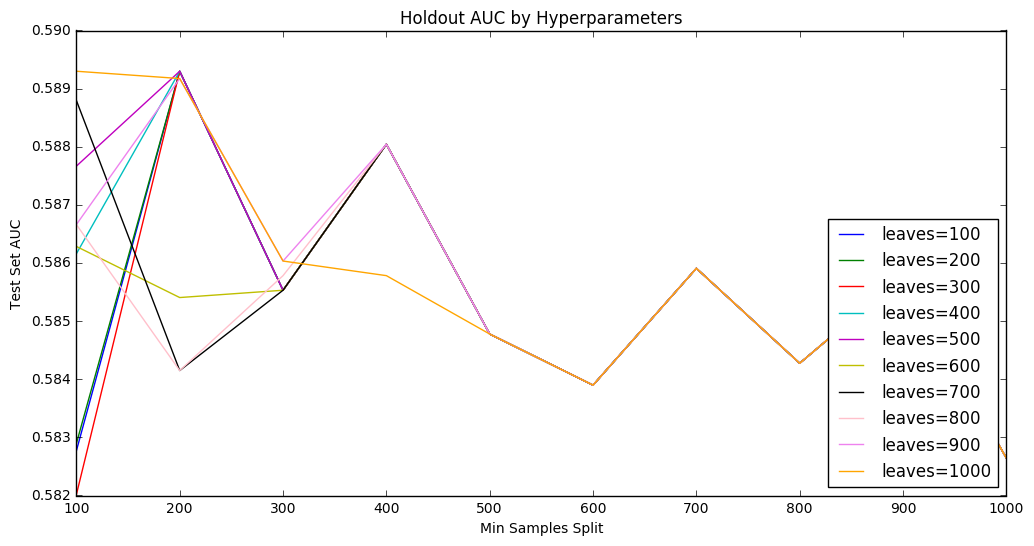

In [36]:
plt.rcParams['figure.figsize'] = 12, 6
fig = plt.figure()
ax=fig.add_subplot(111)

c = ['b','g','r','c','m','y','k','pink','violet','orange']


plt.plot(splits,res[splits[0]], color = c[0], label = 'leaves={}'.format(leaves[0]))
plt.plot(splits,res[splits[1]], color = c[1], label = 'leaves={}'.format(leaves[1]))
plt.plot(splits,res[splits[2]], color = c[2], label = 'leaves={}'.format(leaves[2]))
plt.plot(splits,res[splits[3]], color = c[3], label = 'leaves={}'.format(leaves[3]))
plt.plot(splits,res[splits[4]], color = c[4], label = 'leaves={}'.format(leaves[4]))
plt.plot(splits,res[splits[5]], color = c[5], label = 'leaves={}'.format(leaves[5]))
plt.plot(splits,res[splits[6]], color = c[6], label = 'leaves={}'.format(leaves[6]))
plt.plot(splits,res[splits[7]], color = c[7], label = 'leaves={}'.format(leaves[7]))
plt.plot(splits,res[splits[8]], color = c[8], label = 'leaves={}'.format(leaves[8]))
plt.plot(splits,res[splits[9]], color = c[9], label = 'leaves={}'.format(leaves[9]))
plt.legend(loc = 4)
ax.set_xlabel('Min Samples Split')
ax.set_ylabel('Test Set AUC')
plt.title('Holdout AUC by Hyperparameters')



4\. Which configuration returns the best accuracy? What is this accuracy? (Note, if you don't see much variation in the test set accuracy across values of min_samples_split or min_samples_leaf, try redoing the above steps with a different range of values).

In [37]:
## The AUC graph shows that when splits are 220 and minimum leaves of 900, the model gets its best accuracy. 
testTrees(train_x, train_y, test_x, test_y, split = 220 ,leaf = 900 )

0.58578246671690526

5\. If you were working for a marketing department, how would you use your churn production model in a real business environment? Explain why churn prediction might be good for the business and how one might improve churn by using this model.

Below is the tree prediction model generated from the data. This model is easy to intepret. To predict the churn class for a new instance, just throw it in and go through the tree down to the leaf and get its predicted class. the class is represented by: c for not churn and h for churn, while darker color indicates higher possibility of the predicted class. 

The model gets overall 60% of accuracy, while random guess gets 50% of accuracy, choose from the majority class in the dataset also gives you 50% accuracy. Our model can do 10% better than those guesses. This is a prediction model tht serves for predicting situations which do not happend yet. That means with this model, marketers can better predict whether a customer will churn before it actually happens. Then marketers can implement their promotion campaigns to the right customer. For example, they may want to design a campaign only for those customers with high spend in outcalls, since this is a good predictor of churn. This implementation can increase the customer lifetime value and increase the overall revenue. 

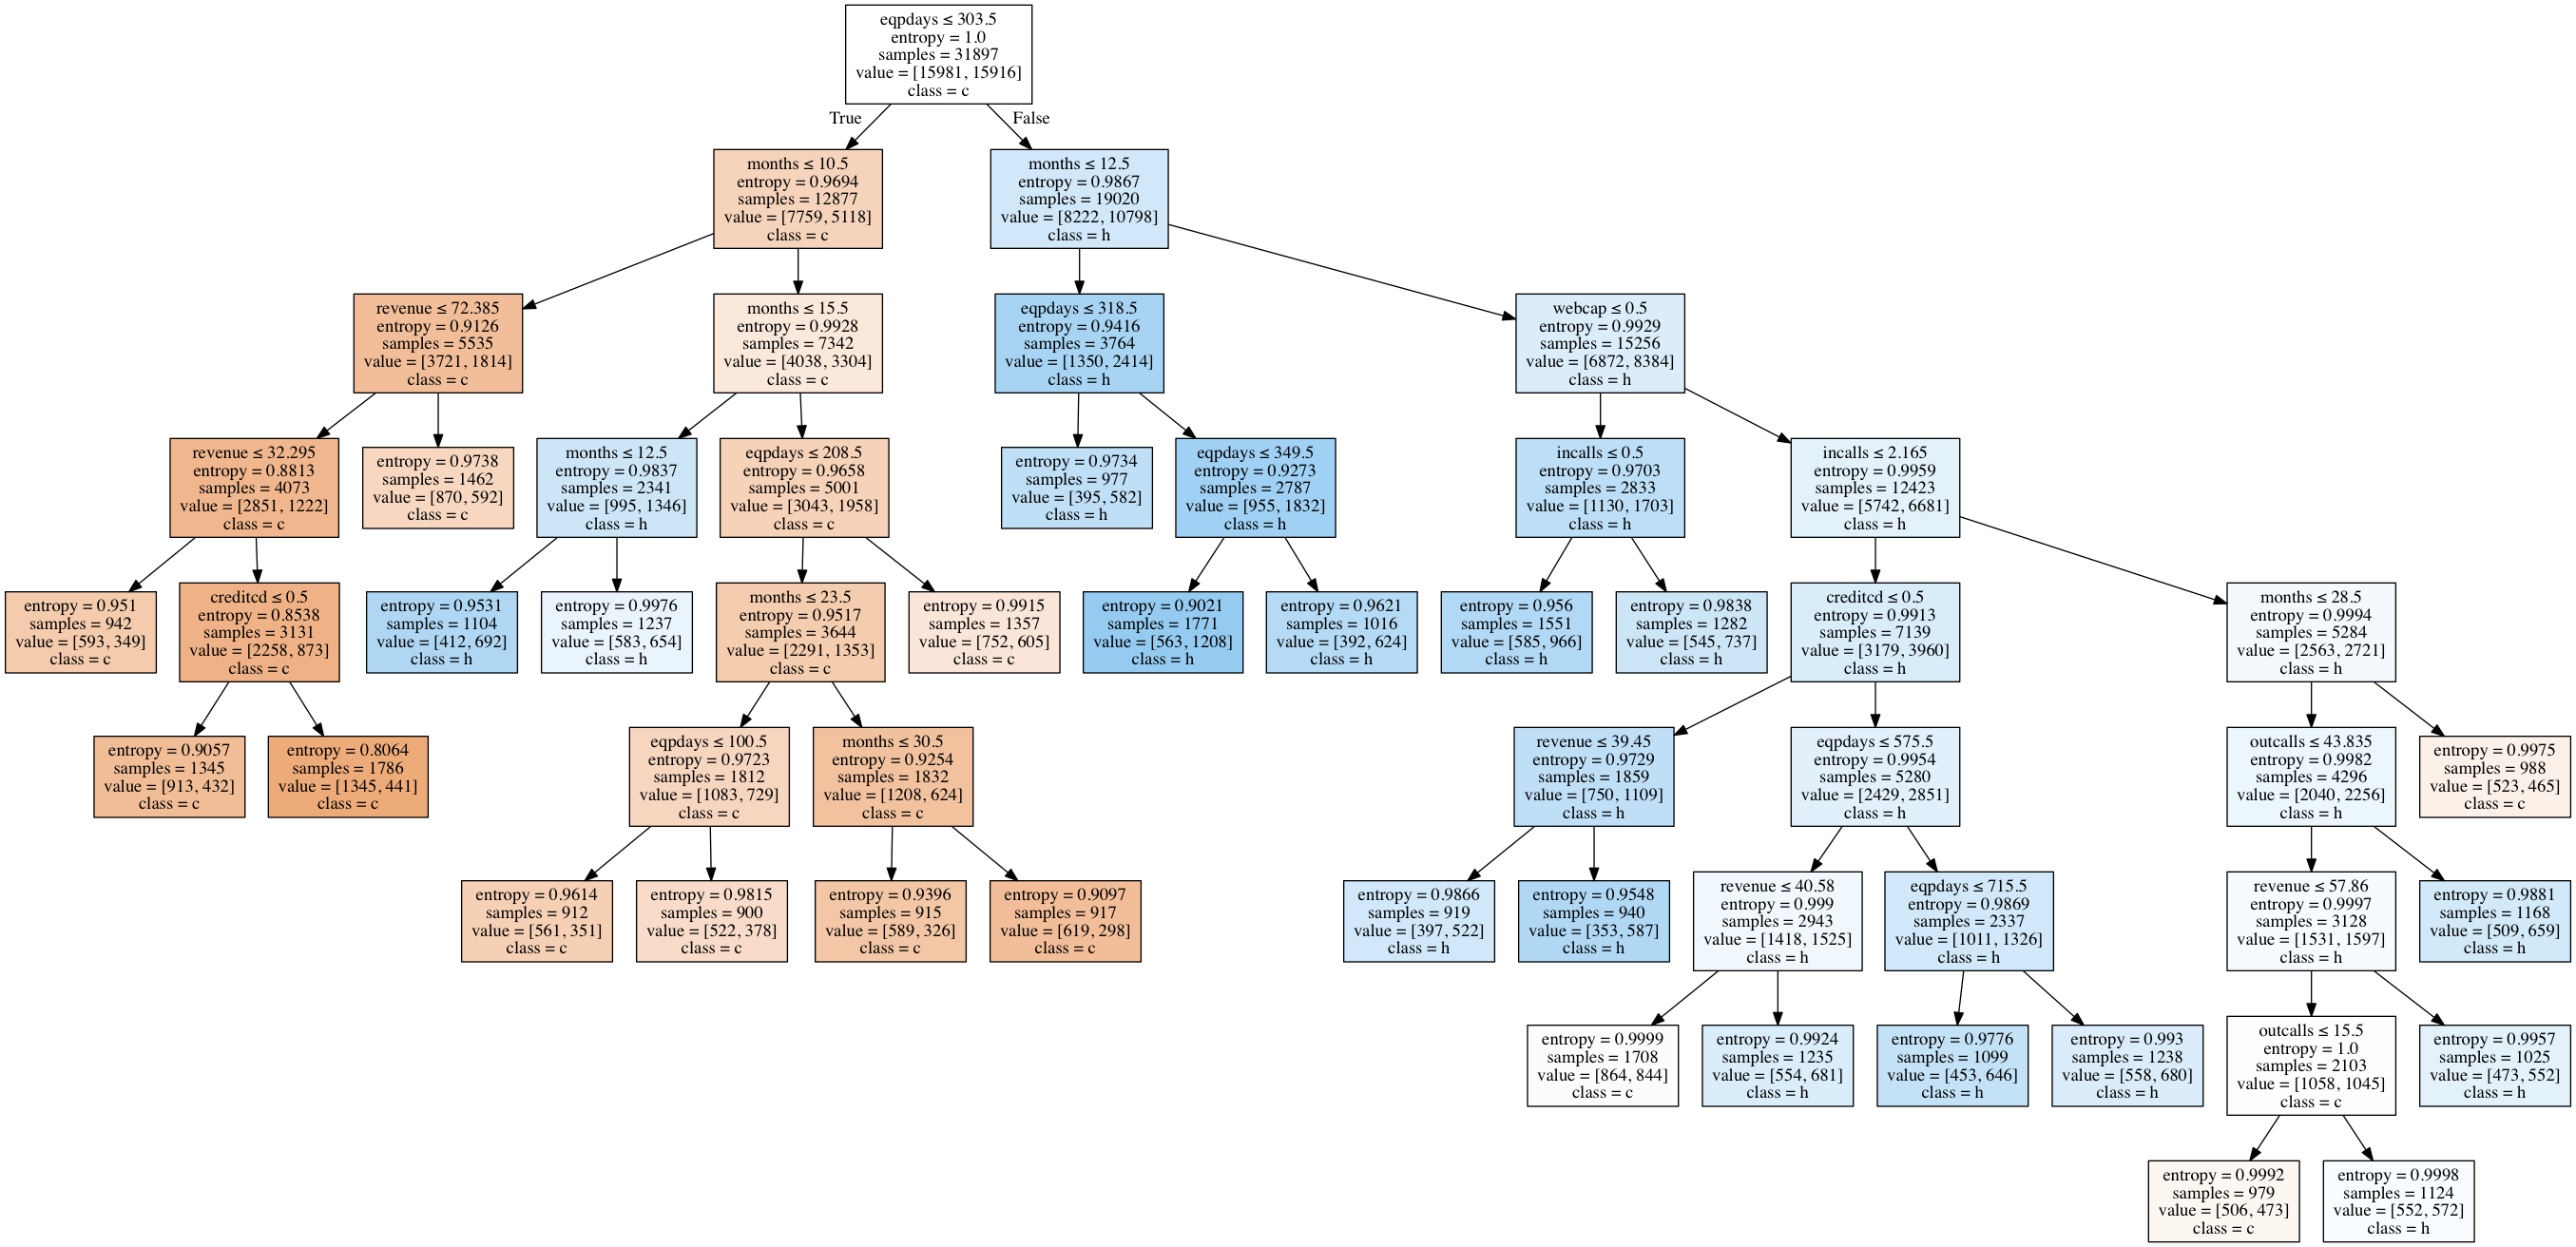

In [39]:
tree = sklearn.tree.DecisionTreeClassifier(criterion='entropy', min_samples_leaf = 900, min_samples_split = 220)
tree.fit(train_x, train_y)
export_graphviz(tree, 
                feature_names = train_x.columns.values,
                class_names = 'churndep',
                filled=True,
                special_characters=True,
                out_file= "tree.dot")
!dot -Tpng tree.dot -o tree.png

from IPython.display import Image
Image(filename='tree.png') 

#c == not churn, h == churn. 